# Общие свойства наночастиц различной природы

# Содержание
- [Конспект лекции](#%D0%9A%D0%BE%D0%BD%D1%81%D0%BF%D0%B5%D0%BA%D1%82-%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8)
   - [Гомогенная нуклеация нанокристаллов из раствора](#%D0%93%D0%BE%D0%BC%D0%BE%D0%B3%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F-%D0%BD%D1%83%D0%BA%D0%BB%D0%B5%D0%B0%D1%86%D0%B8%D1%8F-%D0%BD%D0%B0%D0%BD%D0%BE%D0%BA%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%BB%D0%BB%D0%BE%D0%B2-%D0%B8%D0%B7-%D1%80%D0%B0%D1%81%D1%82%D0%B2%D0%BE%D1%80%D0%B0)
   - [Гетерогенная нуклеация](#%D0%93%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D0%B3%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F-%D0%BD%D1%83%D0%BA%D0%BB%D0%B5%D0%B0%D1%86%D0%B8%D1%8F)
   - [Синтез в мицеллах](#%D0%A1%D0%B8%D0%BD%D1%82%D0%B5%D0%B7-%D0%B2-%D0%BC%D0%B8%D1%86%D0%B5%D0%BB%D0%BB%D0%B0%D1%85)
   - [Коллоидная устойчивость](#%D0%9A%D0%BE%D0%BB%D0%BB%D0%BE%D0%B8%D0%B4%D0%BD%D0%B0%D1%8F-%D1%83%D1%81%D1%82%D0%BE%D0%B9%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C)
   - [Способы управления седиментационной устойчивостью дисперсионных систем. Седиментационный анализ и оптичесеские методы определения размеров частиц и $\zeta$-потенциала](#%D0%A1%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D1%8B-%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F-%D1%81%D0%B5%D0%B4%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9-%D1%83%D1%81%D1%82%D0%BE%D0%B9%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C%D1%8E-%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85-%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC.-%D0%A1%D0%B5%D0%B4%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B8-%D0%BE%D0%BF%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%B5%D1%81%D0%BA%D0%B8%D0%B5-%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B-%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BE%D0%B2-%D1%87%D0%B0%D1%81%D1%82%D0%B8%D1%86-%D0%B8-%24%5Czeta%24-%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D0%B0)
- [Методы оценки размера частиц](#%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%B0-%D1%87%D0%B0%D1%81%D1%82%D0%B8%D1%86)
- [Электрофоретическое осаждение и понятие зета-потенциала](#%D0%AD%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D1%84%D0%BE%D1%80%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5-%D0%BE%D1%81%D0%B0%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B8-%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D0%B5-%D0%B7%D0%B5%D1%82%D0%B0-%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D0%B0)
- [Задачи и упражнения](#%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8-%D0%B8-%D1%83%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F)
- [Литература](#%D0%9B%D0%B8%D1%82%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0)

# Конспект лекции

## Гомогенная нуклеация нанокристаллов из раствора

Когда концентрация растворенного вещества $C$ в растворителе превышает его равновесную растворимость $C_0$ или температура опускается ниже точки фазового перехода, возникает новая фаза. Полная энергия системы уменьшается за счет выпадения растворенного вещества в твердой фазе. Уменьшение энергии Гиббса является движущей силой как нуклеации, так и роста частиц.

Для сферической частицы радиусом $r$ изменение полное изменение химического потенциала описывается

$$\Delta G = \Delta \mu_V + \Delta \mu_S = \frac{4\pi r^3}{3} \Delta G_V + 4\pi r^2 \gamma,$$

где $\Delta G_V$ — удельное объемное изменение энергии Гиббса:

$$\Delta G_V = -\dfrac{kT \ln \frac{C}{C_0} }{V_m} =  -\dfrac{kT \ln(1+\sigma)}{V_m},$$

$V_m$ — объем, занимаемый мономером в твердом теле, $\sigma=\frac{C-C_0}{C_0}$ — концентрационное пересыщение.

Анализ приведенного выражения показывает, что при малых $r$ преобладает слагаемое, связанное с поверхностью и $\Delta G$ положительна, при больших $r$ основную роль играет объемная составляющая и тогда $\Delta G$ отрицательна. Из условия максимума относительно $r$:

$$\dfrac{\partial \Delta G}{\partial r} = 4\pi r^2 \Delta G_V + 8\pi r \gamma = 0,$$

отсюда можно найти значение критического радиуса $r_c$:

$$r_с = -\dfrac{2\gamma}{\Delta G_v} = \dfrac{2\gamma V_m}{kT \ln \frac{C}{C_0}}$$

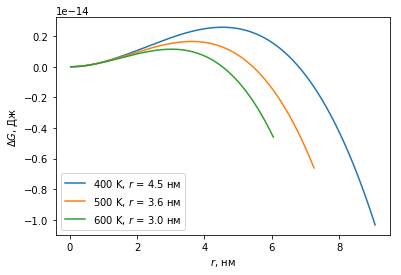

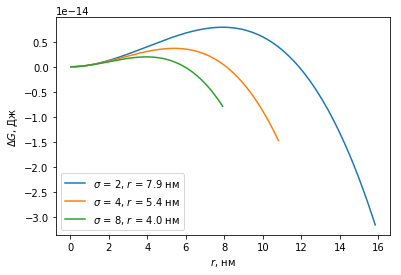

In [78]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


k = 1.38e-23
V = 4/3*np.pi*r**3
V_m = 1e-30    # типичный порядок объема, приходящийся на один мономер
T = 273+200    # типичные порядки температуры синтеза
sigma = 10     # относительное пересыщение
gamma = 30     # порядки поверхностного натяжения для твердых тел - не менее 1 Н/м

r_c = 2*gamma*V_m/(k*T*np.log(1+sigma))
r = np.linspace(0.01*r_c, 1.5*r_c, 1000)

def Delta_G(r, T, sigma, gamma):
    Delta_G_V = -k*T*np.log(1+sigma)/V_m
    Delta_mu_V = 4/3*np.pi*r**3*Delta_G_V
    Delta_mu_S = 4*np.pi*r**2*gamma
    return Delta_mu_V+Delta_mu_S

for T in [400, 500, 600]:
    r_c = 2*gamma*V_m/(k*T*np.log(1+sigma))
    r = np.linspace(0.01*r_c, 2*r_c, 1000)
    label = '{0} K, $r$ = {1:.1f} нм'.format(T, r_c/1e-9)
    plt.plot(r/1e-9, Delta_G(r, T, sigma, gamma), label=label)

plt.xlabel('$r$, нм')
plt.ylabel('$\Delta G$, Дж')
plt.legend()
plt.show()

for sigma in [2, 4, 8]:
    T=500
    r_c = 2*gamma*V_m/(k*T*np.log(1+sigma))
    r = np.linspace(0.01*r_c, 2*r_c, 1000)
    label = '$\sigma$ = {0}, $r$ = {1:.1f} нм'.format(sigma, r_c/1e-9)
    plt.plot(r/1e-9, Delta_G(r, T, sigma, gamma), label=label)

plt.xlabel('$r$, нм')
plt.ylabel('$\Delta G$, Дж')
plt.legend()
plt.show()


## Гетерогенная нуклеация

Когда новая фаза образуется на поверхности другого материала, такой процесс называется гетерогенной нуклеацией. Рассмотрим процесс гетерогенной нуклеации на плоской твердой подложке. Предположим, что компоненты наращиваемого вещества осаждаются на поверхности подложки из газовой фазы, мигрируют и агрегируют с образованием ядра округлой формы. Как и в случае гомогенной нуклеации, это сопровождается уменьшением свободной энергии Гиббса и увеличением поверхностной энергии. Общее изменение $\Delta G$, связанное с образованием ядра описывается формулой:

$$
\Delta G = a_1 r^2 \gamma_{vf} + a_2r^2(\gamma_{fs}-\gamma_{sv}) + a_3 r^3 \Delta \mu_V,
$$

где $r$ — средний радиус ядра, $\gamma_{vf}$, $\gamma_{fs}$, $\gamma_{sv}$ — энергия на единицу границы раздела газ-ядро, ядро-подложка, подложка-газ соответственно, $\Delta \mu_V$ — изменение свободной энергии Гиббса на единицу объема. Геометрические постоянные:

$$a_1 = 2\pi (1-\cos \theta),$$

$$a_2 = \pi \sin^2 \theta,$$

$$a_3 = 3\pi (2 - 3 \cos \theta + \cos^2 \theta),$$

где $\theta$ — контактный угол, который зависит только от свойств контактирующих поверхностей и определяется по уравнению Юнга:

$$
\gamma_{sv} = \gamma_{fs} + \gamma_{vf}\cos \theta.
$$

Образующееся ядро будет стабильным, если его радиус будет больше критического радиуса $r_c$:

$$
r_c = \dfrac{2(a_2\gamma_{sv}-a_2\gamma_{fs}-a_1\gamma_{vf})}{3a_3\Delta G_V}.
$$

Подставляя геометрические постоянные, получаем:

$$
r_c = \dfrac{2\pi\gamma_{vf}}{\Delta G_V} \dfrac{\sin^2\theta \cos \theta + 2 \cos \theta - 2}{2 - 3 \cos \theta + \cos^3 \theta}.
$$

Видно, что первый множитель выражения связан с критическим энергетическим барьером для гомогенной нуклеации, а второй представляет собой фактор смачивания. Если контактный угол равен 180, т.е. новая фаза совершенно не смачивает подложку, фактор смачивания равен единице и величина критического зародыша равна величине для гомогенной нуклеации.

## Поточный синтез

Последовательность операций, осуществляемая в реакторе поточного типа, в общем виде сводится к следующему. Растворы прекурсоров (источников ионов, составляющих материал частиц) вводят в канал, где происходит смешивание реагентов. После этого раствор смешанных прекурсоров попадает в контур, нагреваемый до $T_n$, где происходит образование зародышей нанокристаллов. Продвигаясь далее, поток проходит через контур, нагретый до $T_g$ (в некоторых случаях контуры $T_n$ и $T_g$ не разделяют). Весь синтез протекает в узком канале – капилляре микрофлюидной системы или гибком капилляре из термостойкого полимера.
Микроканалы позволяют с высокой точностью регулировать температуру
синтеза – канал диаметром 200 мкм можно нагреть от комнатной температуры до 300 °С за 0,4 с. Небольшой объем реактора дает возможность использовать дорогостоящие реагенты, а параллельное использование нескольких реакторов позволяет в непрерывном режиме проводить синтез в промышленных масштабах. Использование прозрачных материалов для ультрафиолетового и видимого излучения делает возможным осуществление экспресс-контроля качества синтезируемого материала при помощи оптических устройств.

## Синтез в мицеллах

Синтез как металлических, так и полупроводниковых наночастиц можно осуществлять, проводя реакцию в органическом пространстве. Примером служит синтез наночастиц в мицеллах или микроэмульсиях. Микроэмульсия — термодинамически устойчивая дисперсия двух несмешивающихся жидкостей, полученная с помощью поверхностно-активного вещества (ПАВ), часто в сочетании с сопутствующим ПАВ (со-ПАВ).

Например, микроэмульсия типа «вода в масле» образуется когда вода диспергируется в органическом растворителе. Когда поверхностно-активные вещества растворяются в смешанной среде, они располагаются на границах раздела сред, понижая поверхностное натяжение между маслом и водой. При этом гидрофильная часть направлена в сторону водного раствора, а гидрофобная — в сторону углеводорода. Когда концентрация поверхностно-активных веществ превышает критический уровень, они самоорганизуются с образованием мицелл. Микроэмульсия, таким образом, представляет собой дисперсию мельчайших капель капель вещества одной природы в общем объеме вещества другой природы. 

Одной из основных характеристик мицеллообразования является критическая концентрация мицелообразования (ККМ) – это концентрация молекул поверхностно-активного вещества, при которой начинается образование мицелл. Микроэмульсии могут образовываться в смесях индивидуального ПАВ, масла и воды, но во многих случаях для их образования требуется введение второго немицеллообразующего поверхностно-активного вещества, так называемого со-ПАВ, например, спирта с гидрофобным радикалом среднего размера или простого эфира.

Фазовое поведение трехкомпонентных микроэмульсионных систем, состоящих
из масла, воды и ПАВ может быть изучено с помощью тройной фазовой диаграммы (при фиксированном давлении и температуре); каждый угол диаграммы соответствует 100%-ной концентрации определенного компонента (рис.). 

![](Figs/mic-scheme.png)

*Рис. Вид диаграммы фазового состояния трехкомпонентной системы вода –
ПАВ – углеводород*

В зависимости от того, какая жидкость образует макрофазу, выделяют три
основных типа микроэмульсий:
* Прямая микроэмульсия типа «масло в воде» (М/В) представляет собой
ультрамикрокапли масла, взвешенные в водной среде, при этом межфазная
поверхность сильно искривлена в сторону масла;
* Обратная микроэмульсия типа «вода в масле» (В/М) – ультрамикрокапли воды, взвешенные в неполярной органической фазе, межфазная поверхность сильно искривлена в сторону водной фазы;
* Биконтинуальная микроэмульсия представляет собой динамически переплетенные сетки масла и воды, стабилизированные монослоем ПАВ на
границах раздела фаз, и характеризуется высокими коэффициентами диффузии обоих растворителей, при этом межфазная поверхность имеет  нулевую среднюю кривизну.

Благодаря уникальному строению микроэмульсии могут быть использованы в
качестве реакционных «контейнеров» для проведения множества химических
реакций. В процессе мицеллярного синтеза реакции протекают между теми реагентами, которые находятся внутри мицелл, и рост прекращается по мере их расхода. Характерные размеры капель составляют 10-100 нм. 


## Коллоидная устойчивость

![](Figs/two_gold_nanoparticles.png)

Рис. Серия электронных микрофотографий (ПЭМ ВР), изображающих коагуляцию двух наночастиц золота. Ориентация плоскостей кристаллической решетки изменяется от кадра к кадру, указывая на движение частиц. Во время коагуляции граница зерен не образуется, а выравнивается ориентация двух частиц друг относительно друга. В процессе коагуляции результирующая частица становится все более округленной

## Способы управления седиментационной устойчивостью дисперсионных систем. Седиментационный анализ и оптичесеские методы определения размеров частиц и $\zeta$-потенциала

Рассмотрим задачу о движении круглого твердого тела радиуса $r$ массой $m$ из материала с плотностью $\rho_s$ в жидкой среде с плотностью $\rho_l$ и lдинамической вязкостью $\eta$. Движению тела вниз способствует сила тяжести $F_g$, но противодействуют сила Архимеда и сила трения. В соответствии с первым законом Ньютона получаем:

$$F_A + F_\text{тр} - F_g = 0.$$

Опишем каждую компоненту, учитывая [закон Стокса](https://ru.wikipedia.org/wiki/Закон_Стокса):

$$\rho_l g V_s + 6 \pi \eta r v_s = m_s g,$$

$$\rho_l g V_s + 6 \pi \eta r v_s = \rho_s g V_s$$.

Выразим отсюда скорость движения частицы с учетом рассмотренных сил:

$$v_s = \dfrac{2 r^2 g (\rho_l-\rho_s)}{9 \eta}.$$

В случае малых частиц формой частиц обычно принебрегают так как есть смысл говоришь лишь о некотором *гидродинамическом* радиусе. В этом рассмотрении важно, что частицы не взаимодействуют друг с другом.

Если рассматривать только указанные силы, то любое тело с плотностью большей, чем плотность жидкости должно опускаться на дно сосуда. Однако наночастицы в коллоидном растворе остаются устойчивы неограниченно долгое времея. Что пока не учитывает описанная модель? Броуновское тепловое движение.

Средняя кинетическая энергия частицы равна средней кинетической энергии молекул, вызывающих броуновское движение:

$$\dfrac{mv_T^2}{2} = \dfrac{3}{2}kT,$$

$$v_T = \sqrt{\dfrac{3kT}{m}} = \dfrac{3}{2}\sqrt{\dfrac{kT}{\rho_s \pi r^3}} .$$

In [8]:
import os
os.chdir('../Data')

import numpy as np
import pandas as pd    # библиотека для работы с табличными данными
import matplotlib.pyplot as plt


def v_s(r, rho_l, rho_s, eta):
    g = 9.81
    return 2*r**2*(rho_s-rho_l)/(9*eta)

def v_T(r, rho_s, T):
    k = 1.38e-23
    return 1.5**np.sqrt(k*T/(rho_s*np.pi*r**3))

In [64]:
metals = pd.read_csv("metals.csv")
liquids = pd.read_csv("liquids.csv")

rho_s = metals[metals['Формула'] == 'Au']['Плотность, г/см3'].item()*1000
rho_l = liquids[liquids['Название'] == 'Вода']['Плотность, г/см3'].item()*1000
eta = liquids[liquids['Название'] == 'Вода']['Динамическая вязкость, Па*с'].item()

T = 298
r = 10e-9

print("Скорость седиментации равна {:.1e} м/с.".format(v_s(r, rho_l, rho_s, eta)))
print("Скорость теплового движения равна {:.1e} м/с.".format(v_T(r, rho_s, T)))
print("Отношение тепловой скорости к скорости седиментации составляет {:.2e}.".format(v_T(r, rho_s, T)/v_s(r, rho_l, rho_s, eta)))

Скорость седиментации равна 4.6e-10 м/с.
Скорость теплового движения равна 1.1e+00 м/с.
Отношение тепловой скорости к скорости седиментации составляет 2.43e+09.


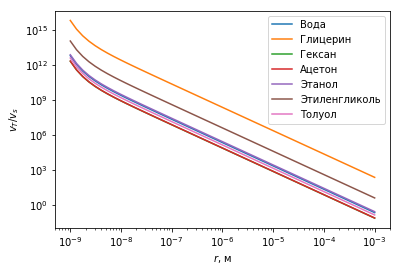

In [76]:
# при комнатной температуре

r = np.geomspace(1e-9, 1e-3)
plt.xlabel('$r$, м')
plt.ylabel('$v_T/v_s$')

for index, liquid in liquids.iterrows():
    rho_l = liquid['Плотность, г/см3']
    eta = liquid['Динамическая вязкость, Па*с']
    plt.loglog(r, v_T(r, rho_s, T)/v_s(r, rho_l, rho_s, eta), '-', label=liquid['Название'])

plt.legend()
plt.show()

Среднее смещение частицы $\Delta$ c учетом вязкости среды определяется коэффициентом диффузии $D$ и временем наблюдения $t$:

$$\Delta = \sqrt{2Dt}.$$

Выражение для коэффициента диффузии частиц, участвующих броуновским движением было определено А.Эйнштейном:

$$D = \dfrac{kT}{ 6 \pi \eta r}.$$

Если $v_s > v_T$ происходит седиментация, в обратном случае раствор седиментационно устойчив. Известно, что крупные частицы с размерами более 5 мкм в броуновском движении практически не участвуют (неподвижны или седиментируют), более мелкие частицы (менее 3 мкм) двигаются поступательно по весьма сложным траекториям или вращаются.

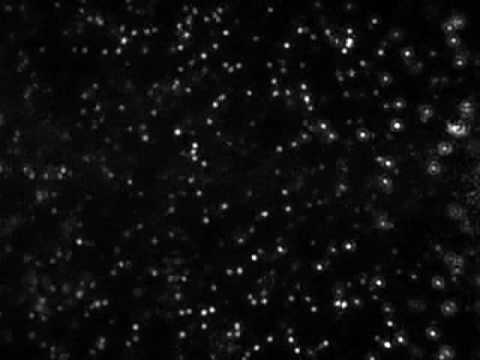

In [1]:
'''На видео ниже представлена иллюстрация броуновского движения.
Наблюдаемые вспышки - рассеиваемое наночастицами лазерное излучение.'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('cDcprgWiQEY')

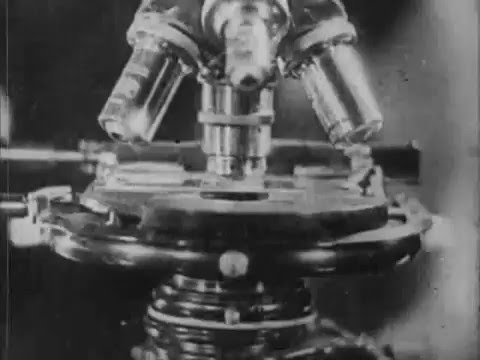

In [2]:
'''Немой фильм 1937 г. о Броуновском движении'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('7YhAnYiIwSE')

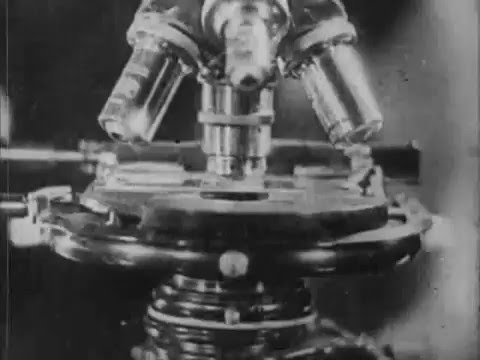

In [3]:
'''Метод очистки газа от малых частиц в присутствии
электрического поля'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('7YhAnYiIwSE')

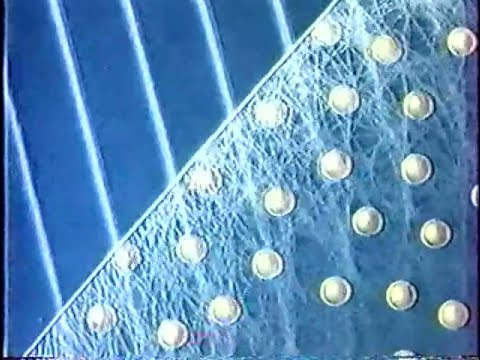

In [4]:
'''Дисперсия и рассеяние света'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('gW6sMiM3ZDc')

# Изоляция наночастиц и размерно-селективное осаждение

Непосредственно после того, как получен коллоидный раствор, содержащий частицы нужных размеров, его необходимо очистить от побочных продуктов и непрореагировавших компонентов, чтобы остановить рост частиц, который медленно может продолжаться при комнатной температуре и получить коллоидный раствор, содержащий только частицы и растворитель. Решение задачи состоит во введении сильно полярного вещества – осадителя, чаще всего безводного метанола. Частицы из-за покрывающих их молекул ПАВ, обращенных гидрофобной частью в раствор, неустойчивы в среде полярного растворителя и флокулируют (выпадают в осадок), в то время как легкие молекулы и ионы непрореагировавших веществ остаются в растворе. Флокуляцию ускоряют за счет центрифугирования раствора.

Аналогичный подход может быть применен для разделения частиц по размеру. При введении меньшего количества осадителя в первую очередь флокулируют самые крупные частицы, поскольку между ними сильнее взаимодействие Ван-дер-ваальса. Для этого в очищенный раствор КТ медленно добавляется осадитель до появления опалесценции (рассеяния света), означающей начало образования флокулята. Отделяя центрифугированием осадок (более крупные частицы) и раствор (более мелкие) и заново диспергируя осадок, можно получить два коллоидных раствора с меньшим разбросом размеров частиц, чем исходно. Повторение этой процедуры позволяет получить растворы частиц со все более узкой дисперсией размеров.

## Замена лигандов

![](Figs/ligand_exchange.png)
*Рис. Процесс замены лигандов – переход наночастиц серебра из одной жидкой фазы в другую*

# Методы оценки размера частиц

Кристаллическая структура наноматериалов определяется расположением (упаковкой) атомов, находящихся на расстоянии порядка 0,1 нм друг от друга. На основе анализа дифракционной картины можно идентифицировать кристаллическую фазу материала. Рассеяние на малые углы используется для оценки среднего расстояния между частицами, в то время как дифракция на большие углы применяется для установления атомной структуры наночастиц.

Ширина дифракционных линий тесно связана с размером частиц и их распределением по размеру, а также с дефектами и деформацией нанокристаллов. С уменьшением размера нанокристалла ширина дифракционных линий увеличивается из-за потери дальнего порядка в сравнении с объемным материалом. По шириней линий дифракции можно оценить размер наночастиц, используя формулу Дебая-Шеррера:

$a = \dfrac{0,9\lambda}{B \cos(\theta)},$

где $a$ — размер частицы, $\lambda$ — длина волны рентгеновского излучения, $B$ — полуширина (полная ширина на половине высоты, в радианах) пика рассеянного рентгеновского излучения и $\theta$ — угол Брэгга. Однако уширение линий дифракции приводит к ошибке при анализе структуры частиц с размерами менее 1 нм.

# Электрофоретическое осаждение и понятие зета-потенциала

Метод электрофоретического осаждения заключается в осаждении в присутствии электрического поля наночастиц из коллоидного раствора на поверхность одного из электродов. Электрофоетическое осаждение имеет ряд отличий от электрохимического. Во-первых, при электрофоретическом осаждении, частицы обладают существенно большей массой, чем ионы при электрохимическом осаждении. Во-вторых, наноразмерные частицы в коллоидной дисперсии обычно стабилизированы электростатически или электростерически за счет поверхностно-активных веществ. При диспергировании в полярном растворитеел или в растворе электролита на поверхности наночастиц появляется электрические заряд вследствтие одного или нескольких механизмов:
- частичное растворение
- адсорбция заряда или заряженных частиц
- восстановление или окисление
- физическая адсорбция заряженных частиц полимеров

Комбинация электростатических сил, броуновского движения и осмотических сил приводят к формированию двойного электрического слоя. Электрический потенциал уменьшается с расстоянием. Около поверхности в слое, называемом слой Штерна, потенциал уменьшается линейно, а за пределами слоя Штерна — в диффузионном слое — экспоненциально. Вместе слой Штерна и диффузионный слой образуют структуру двойного электрического слоя.

При приложении внешнего электрического поля заряженные частицы приходят в движение. При движении заряженной частицы часть раствора, окружающая частицу и прочно связанная с ней, будет также двигаться. Плоскость, которая отделяет прочно связанную жидкую пленку от остальной части жидкости, называются «плоскостью скольжения». Электрический потенциал в плоскости скольжения известен как *зета-потенциал*. Этот параметр опрееделяет устойчивость коллоидной дисперсии. Зета-потенциал больше 25 мВ соответствует стабильным дисперсным системам. Величина зета-потенциала может быть выражена следующим образом:

$$\zeta = \dfrac{Q}{4\pi\varepsilon r(1+\kappa r)},$$

где $\kappa$ определяется как 
$$\kappa = \sqrt{\dfrac{\sum{n_iz_i^2e^2}}{\varepsilon \varepsilon_0 kT}},$$

$Q$ — заряд на частице, $r$ — радиус частицы по плоскости скольжения, $\varepsilon$ — относительная диэлектрическая проницаемость среды, $n_i$ и $z_i$ — объемная концентрация и валентность $i$-го иона в системе соответственно. 

Подвижность наночастицы в коллоидном растворе $\mu$ зависит от относительной диэлектрической проницаемости и вязкости жидкой среды $\eta$, зета-потенциала наночастицы $\zeta$. Зависимость описывает уравнение Хюккеля:

$$\mu = \dfrac{2\varepsilon\varepsilon_0\zeta}{3\pi\eta}.$$

В результате передачи заряда от электрода происходит разрушение двойного электрического слоя и частицы осаждаются на электроде. Обычно при электрофоретическом осаждения происходит образование пористого материала. Плотность можно повысить за счет более медленного протекания процесса электрофоретического осаждения в более слабых полях, а также поля, в которой кроме постоянной составляющей имеется меньший по амплитуде переменный сигнал.

In [ ]:
# Результат процесса электрофоретического осаждения частиц оксида алюминия

from IPython.lib.display import YouTubeVideo
YouTubeVideo('FvSgyZBZr5s')

# Упражнения и задачи

1. Мыло образует сферические мицеллы радиусом 12.5 нм. Площадь поперечного сечения «аниона мыла» в адсорбционном насыщенном слое равна 0.25 нм$^2$ . Длина «аниона мыла» составляет приблизительно 2.5 нм. Мицеллы мыла начинают появляться, если
концентрация мыла превышает $1.8\cdot10^{-5}$ М. Задания:
    - Сколько пачек мыла нужно растворить в ванне площадью 1 м$^2$, чтобы полностью покрыть ее адсорбционным монослоем? Масса пачки 100 г.
    - Сколько «анионов мыла» формируют мицеллу? Сколько мицелл
может образоваться из пачки мыла?
    - Каково среднее расстояние между «анионами мыла» в растворе, концентрация которого $1.8\cdot10^{-5}$ М?

# Литература